In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# importing the dataset
cars_df = pd.read_csv("cleaned_dataset_1.csv", index_col='vin')

# checking the shape of the dataset
cars_df.shape

(2599355, 23)

Descriptive Statistics

In the first part of the project, we performed some descriptive statistics on the data to help us understand the distribution of the data and to identify any outliers. In this section, we will go over the results of the descriptive statistics and discuss the findings in more detail.

In [ ]:
# descriptive statistics of the dataset
cars_df.describe()

,daysonmarket,horsepower,maximum_seating,mileage,price,savings_amount,torque,year,combined_fuel_economy,legroom,major_options_count,size_of_vehicle
count,2625946.000,2625946.000,2625946.000,2625946.000,2625946.000,2625946.000,2625946.000,2625946.000,2625946.000,2625946.000,2625946.000,2625946.000
mean,75.514,243.627,5.438,20835.633,31302.483,554.625,264.273,2018.348,26.315,80.244,6.326,470.320
std,104.468,90.510,1.141,28500.976,19331.804,1104.510,107.955,3.234,7.626,3.323,3.466,48.732
min,0.000,63.000,2.000,0.000,256.000,0.000,68.000,1915.000,9.500,0.000,1.000,310.200
25%,15.000,170.000,5.000,5.000,19922.000,0.000,181.000,2017.000,22.500,78.200,4.000,440.200
50%,36.000,228.000,5.000,1099.000,27495.000,0.000,264.273,2020.000,26.083,80.166,6.000,456.500
75%,82.000,300.000,6.000,35246.000,39047.000,786.000,275.000,2020.000,28.500,81.700,8.000,485.400
max,3573.000,1001.000,15.000,109146.000,3299995.000,147414.000,944.000,2021.000,127.000,104.964,59.000,702.000


These results tell us that the average vehicle has been on the market for 75 days, has a horsepower of 243, a maximum seating capacity of 5, a mileage of 20,835 miles, a price of
$31,302, a torque of 264, and was manufactured in 2018. The average vehicle has a combined fuel economy of 26.3 miles per gallon, a legroom of 80.2 inches, a major options count of 6.3, and a size of 470.3 inches.

This table is a little difficult to read, and only accounts for the numerical columns. So, let's visualize the data instead.

We will start by looking at the categorical columns.

In [4]:
cars_df2 = cars_df.copy()

In [ ]:
# checking how many categorical columns are in the dataframe
cars_df2.select_dtypes(include='object').nunique()

body_type          9
engine_type       18
exterior_color    14
fuel_type          8
interior_color    16
make_name         21
model_name        21
seller_rating      5
transmission       4
wheel_system       5
dtype: int64

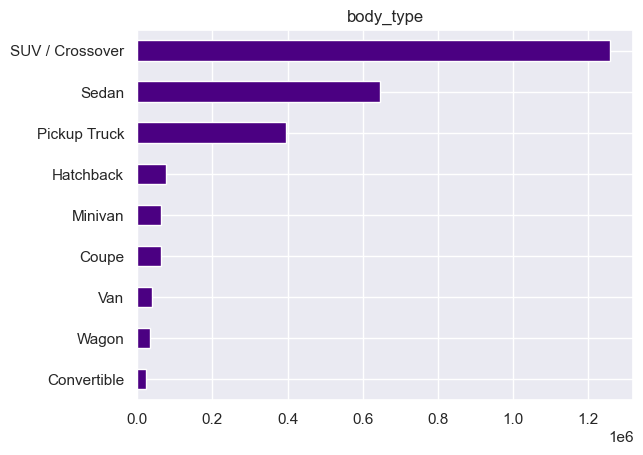

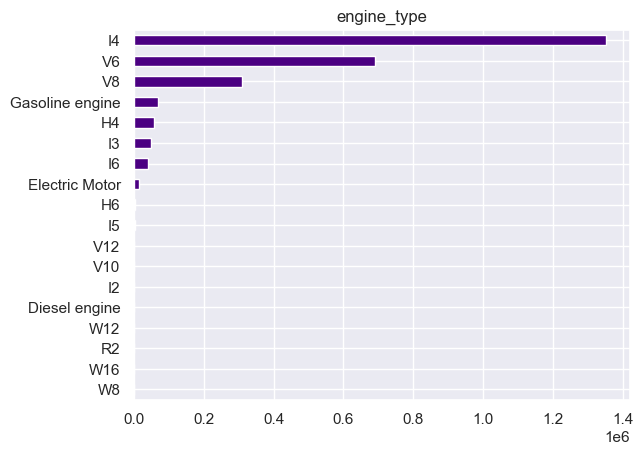

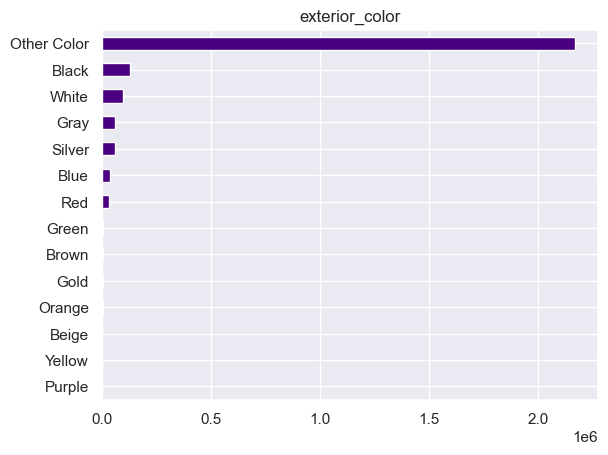

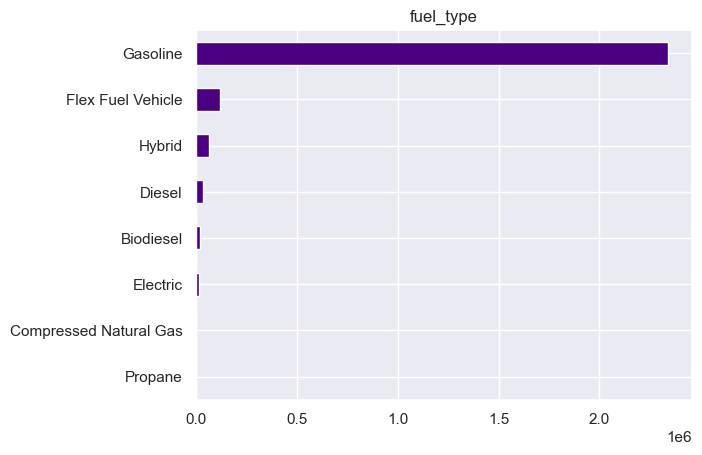

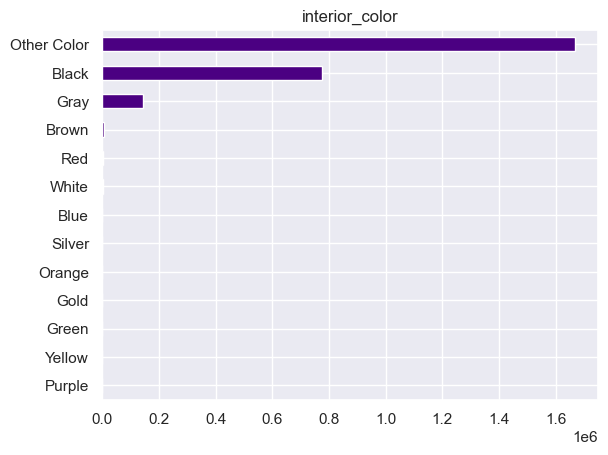

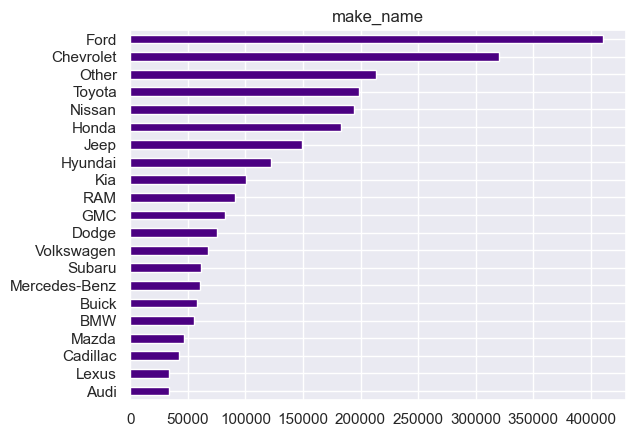

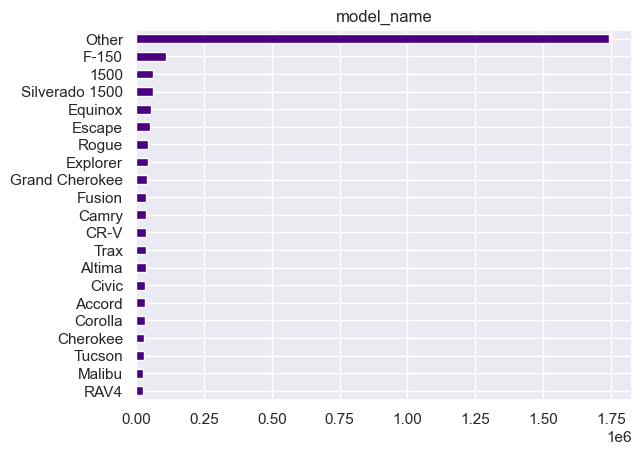

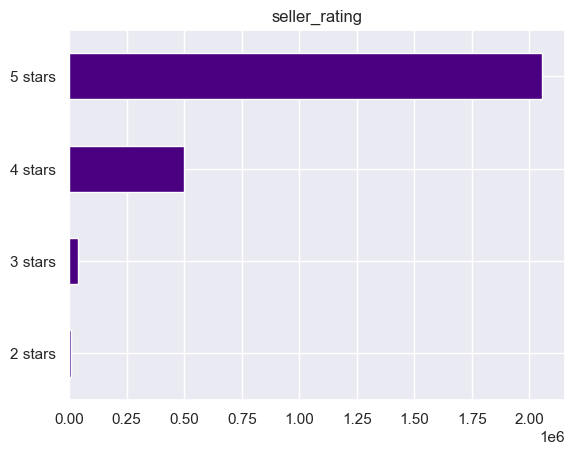

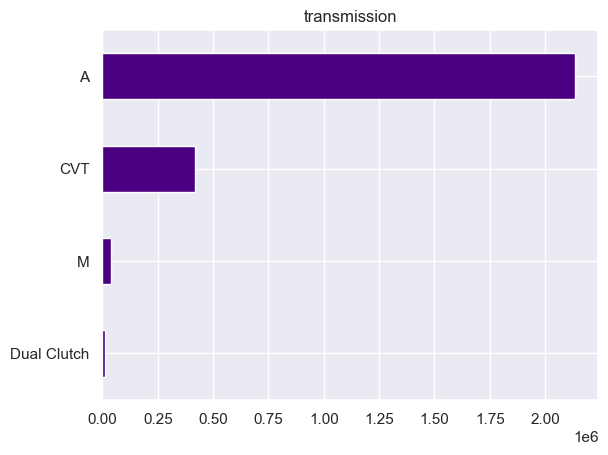

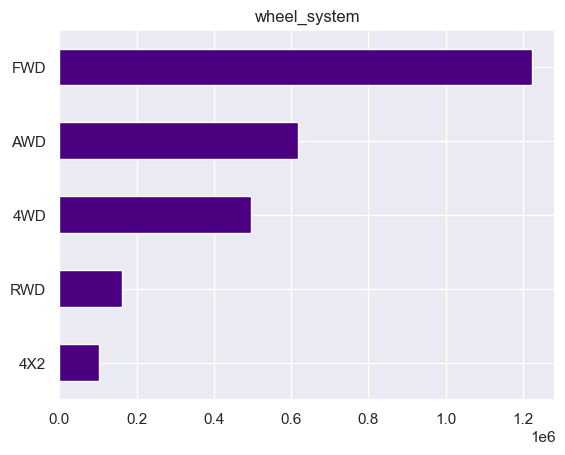

In [5]:
# Pull out the categorical variables
categorical_df = cars_df2.select_dtypes('object')

bar_color = '#4B0082'

# Iterate column by column
for column in categorical_df:

    # Do Something
    categorical_df[column].value_counts().sort_values().plot(kind='barh',color=bar_color)
    plt.title(column)
    plt.show()

Observations:

The top 3 body types are SUV / Crossover, Sedan, and Pickup Truck.

The top 3 engine types are I4, V6, and V8.

Top 3 exterior colors are White, Black, and Gray.

Top 3 fuel types are Gasoline, Flex Fuel, and Hybrid.

Top 3 interior colors are Black, Gray, and Brown.

Top 3 makes are Ford, Chevrolet, and Toyota.

Top 3 models are F-150, Silverado 1500, and 1500.

Most seller ratings are between 5 and 4.

Most common wheel systems are FWD and AWD.


Most common transmission types are Automatic and CVT.

Though we already looked at the numerical columns, lets plot them to get a better understanding of the distribution of the data and see if we missed anything.

In [ ]:
# checking how many numerical columns are in the dataframe
cars_df2.select_dtypes(exclude='object').nunique()

daysonmarket               1571
has_incidents                 2
horsepower                  448
maximum_seating              11
mileage                  108997
price                     85492
savings_amount            10697
torque                      409
year                         96
combined_fuel_economy       166
legroom                     336
major_options_count          54
size_of_vehicle            5786
dtype: int64

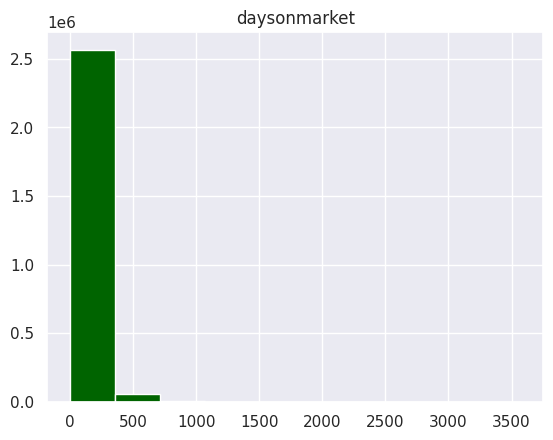

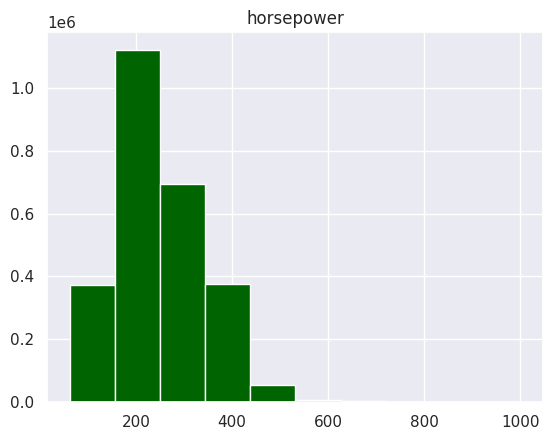

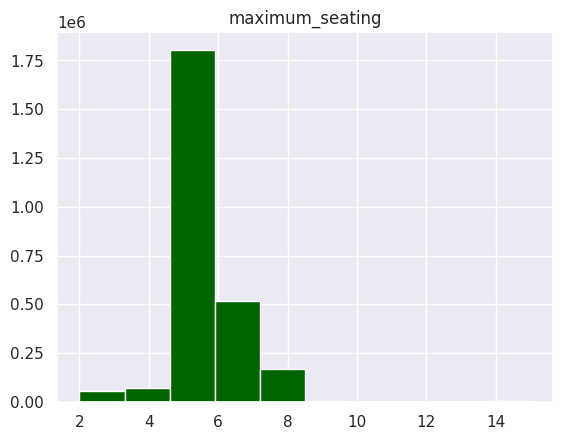

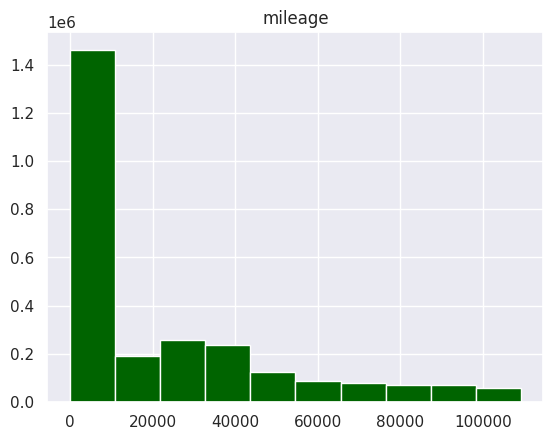

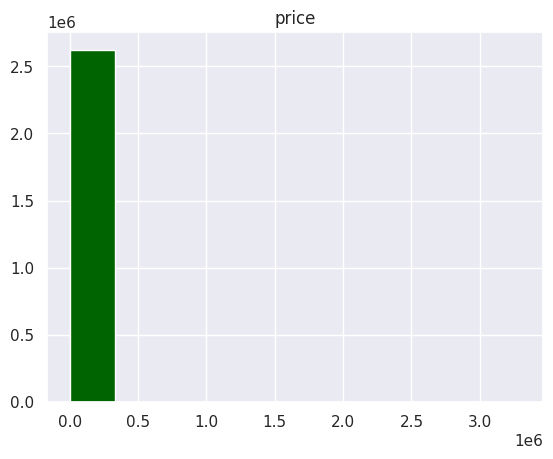

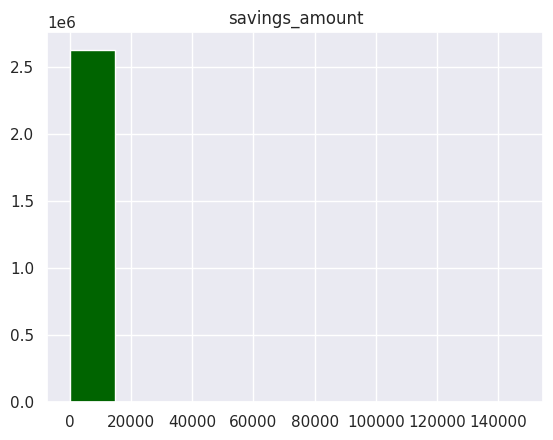

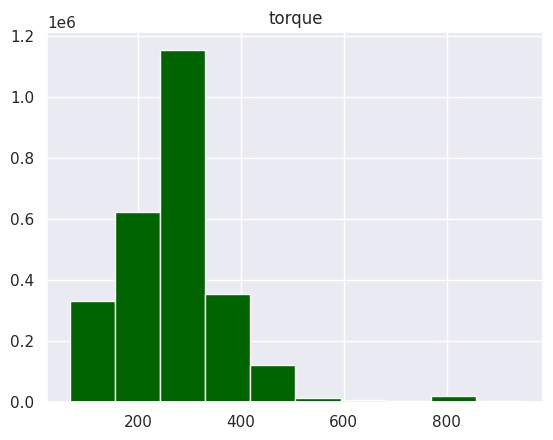

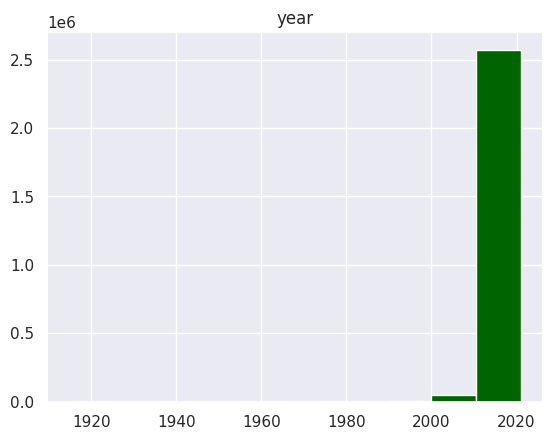

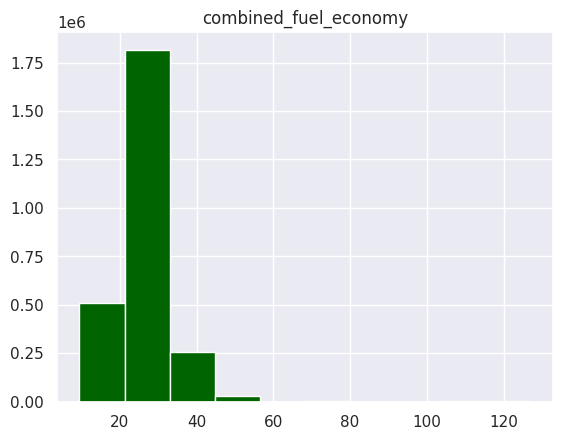

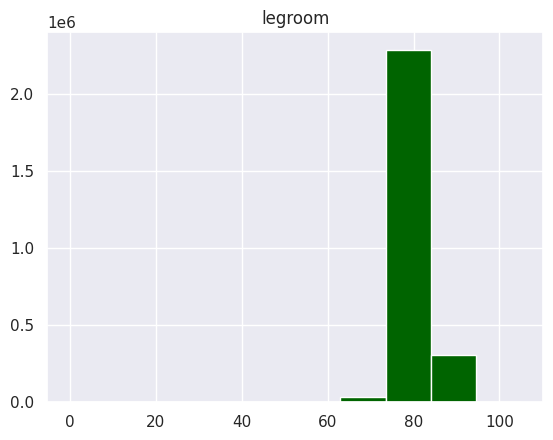

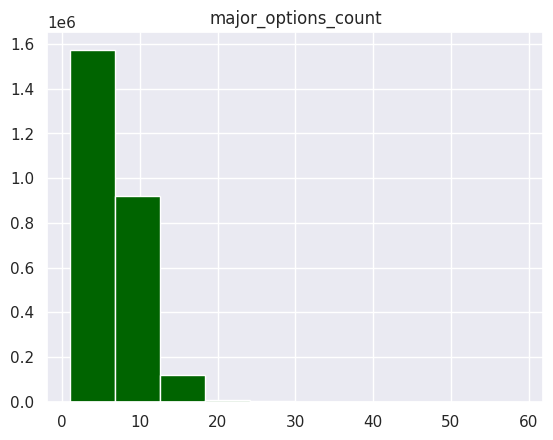

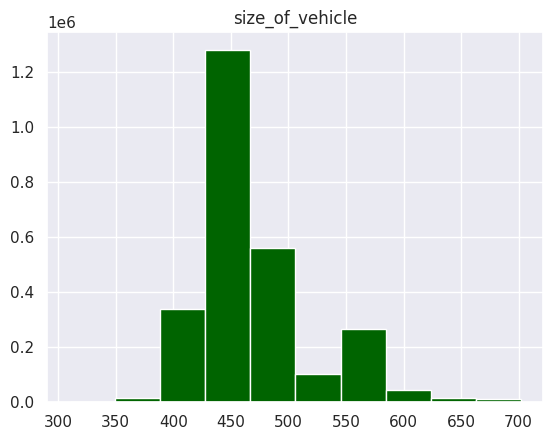

In [ ]:
# Pull out the categorical variables
numerical_df = cars_df2.select_dtypes(['float', 'int64'])

hist_color = '#006400'

# Iterate column by column
for column in numerical_df:

    # Do Something
    numerical_df[column].hist(color=hist_color)
    plt.title(column)
    plt.show()

Observations:

The average listing duration is 75 days.

The average speed is 243 horsepower.

The average vehicle has 5 seats
.
The average vehicle has 4 doors.

Most vehicles being sold are relatively new, with an average mileage of 20,835 miles.

The average price of a vehicle is $29933.37.

The average savings is $554.62.

The average torque is 260 ft-lbs.

The average vehicle is 4 years old, in this dataset.

The average fuel economy is 26.3 miles per gallon.

The average leg room is 80.5 inches.

The average wheelbase is 121.5 inches.

The average major options are 6 options.

The average size of a vehicle is 439.5 inches.

Correlation Analysis

Let's take a look at the correlation between the features. We will start by looking at the correlation between the numerical features.

<ipython-input-9-b224a43c3eb2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = cars_df2.corr()


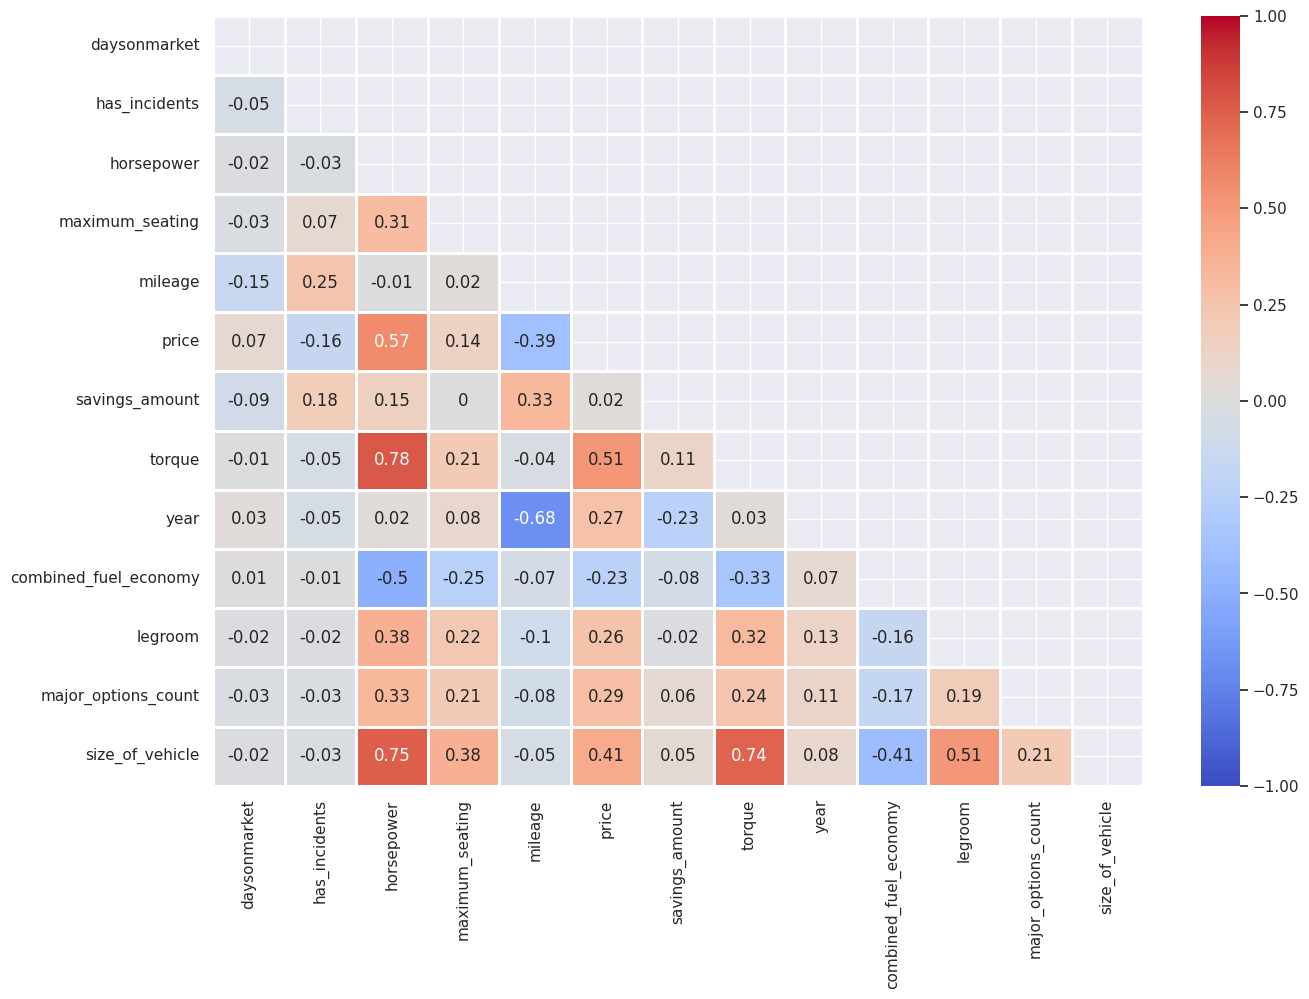

In [ ]:
# instantiating the correlation matrix
corr_df = cars_df2.corr()

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(corr_df)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1,
            center=0, cmap="coolwarm", mask=mask, linewidths=1)
plt.show()

Encoding Categorical Columns

Now before we look at the correlation between the categorical columns, we need to encode them. We will use the get_dummies() function to encode the categorical columns.

In [ ]:
cat_col = cars_df2.select_dtypes(include='object').columns

cat_col

Index(['body_type', 'engine_type', 'exterior_color', 'fuel_type',
       'interior_color', 'make_name', 'model_name', 'seller_rating',
       'transmission', 'wheel_system'],
      dtype='object')

In [ ]:
# looping through the categorical columns and using get_dummies to create dummy variables
for col in cat_col:
    dummies = pd.get_dummies(cars_df2[col], prefix=col, drop_first=True)
    cars_df2 = pd.concat([cars_df2, dummies], axis=1)
    cars_df2.drop(col, axis=1, inplace=True)

# checking the result
cars_df2.head()

,daysonmarket,has_incidents,horsepower,maximum_seating,mileage,price,savings_amount,torque,year,combined_fuel_economy,...,seller_rating_3 stars,seller_rating_4 stars,seller_rating_5 stars,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,522,False,177.000,5,7.000,23141.000,0,200.000,2019,26.083,...,0,0,0,0,0,0,0,0,1,0
SALCJ2FX1LH858117,207,False,246.000,7,8.000,46500.000,0,269.000,2020,26.083,...,1,0,0,0,0,0,0,1,0,0
SALRR2RV0L2433391,196,False,340.000,7,11.000,67430.000,0,332.000,2020,26.083,...,1,0,0,0,0,0,0,1,0,0
SALCJ2FXXLH862327,137,False,246.000,7,7.000,48880.000,0,269.000,2020,26.083,...,1,0,0,0,0,0,0,1,0,0
SALYK2EX1LA261711,242,False,247.000,5,12.000,66903.000,0,269.000,2020,26.083,...,1,0,0,0,0,0,0,1,0,0


It looks like we have drastically increased the number of columns in our dataset.

Lets take a look at the correlation between the features and the target variable.

In [ ]:
# checking the correlation between the price and the other variables
matrix = pd.DataFrame(cars_df2.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')
matrix

,price
price,1.000000
horsepower,0.568885
torque,0.508019
size_of_vehicle,0.410866
engine_type_V8,0.305251
major_options_count,0.285232
year,0.266296
body_type_Pickup Truck,0.257343
legroom,0.255872
engine_type_V12,0.198300


Observations:

The price of a vehicle is positively correlated with horsepower, torque, and size of vehicle, which suggests that larger and more powerful vehicles tend to be more expensive.

The body type of a vehicle (Pickup Truck) and engine type (V8) are positively correlated with price, which could indicate that these types of vehicles tend to be more expensive.

Make and model of a vehicle can also influence the price, with some makes and models being positively correlated with price (e.g. Mercedes-Benz, BMW) while others are negatively correlated (e.g. Chevrolet, Buick).

The exterior and interior color of a vehicle can also impact its price, with some colors being positively correlated (e.g. white) while others are negatively correlated (e.g. brown).

The dealer region can also have an impact on the price of a vehicle, with vehicles sold in certain regions (e.g. Northeast) being more expensive than others (e.g. West).

The fuel type of a vehicle can also impact its price, with certain fuel types (e.g. diesel) being positively correlated with price while others (e.g. hybrid) are negatively correlated.

The number of days a vehicle has been on the market (daysonmarket) can also impact its price, with vehicles that have been on the market for longer periods of time being cheaper.


Feature Selection
In order to make our model more accurate, we will drop the features that are not important to predicting the price of a vehicle. We will use the correlation coefficients to determine which features are important.

Lets set our correlation threshold to 0.05 and -0.05. Meaning that we will only keep the features that have a correlation of 0.05 or higher, or -0.05 or lower. This will help us reduce the number of features in our dataset.

The benefit of reducing the number of features is that it will make our model more accurate and easier to train. We will also be able to train our model faster. This will help us save time and money when training our model on a large dataset.

In [ ]:
# making a list of the columns that have a correlation between 0.05 and -0.05 with the price column
columns_to_drop = []

for col in cars_df2.columns:
    if cars_df2[col].corr(cars_df2['price']) < 0.05 and cars_df2[col].corr(cars_df2['price']) > -0.05:
       columns_to_drop.append(col)

# checking the list
columns_to_drop

['savings_amount',
 'body_type_Minivan',
 'body_type_SUV / Crossover',
 'body_type_Van',
 'engine_type_Electric Motor',
 'engine_type_H4',
 'engine_type_I2',
 'engine_type_I5',
 'engine_type_R2',
 'engine_type_W16',
 'engine_type_W8',
 'exterior_color_Black',
 'exterior_color_Blue',
 'exterior_color_Brown',
 'exterior_color_Gold',
 'exterior_color_Gray',
 'exterior_color_Green',
 'exterior_color_Mixed Colors',
 'exterior_color_Orange',
 'exterior_color_Other Color',
 'exterior_color_Red',
 'exterior_color_White',
 'exterior_color_Yellow',
 'fuel_type_Compressed Natural Gas',
 'fuel_type_Electric',
 'fuel_type_Flex Fuel Vehicle',
 'fuel_type_Hybrid',
 'fuel_type_Propane',
 'interior_color_Black, Gray',
 'interior_color_Blue',
 'interior_color_Brown',
 'interior_color_Gold',
 'interior_color_Gray',
 'interior_color_Green',
 'interior_color_Mixed Colors',
 'interior_color_Orange',
 'interior_color_Other Color',
 'interior_color_Purple',
 'interior_color_Silver',
 'interior_color_White, Bl

Now lots drop the irrelevant features.

In [ ]:
# dropping the columns
cars_df2.drop(columns_to_drop, axis=1, inplace=True)

# checking the result
cars_df2.shape

(2625946, 66)

Lets take a look at the new correlation matrix.

In [ ]:
# checking the correlation between the price and the other variables
pd.DataFrame(cars_df2.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')

,price
price,1.000000
horsepower,0.568885
torque,0.508019
size_of_vehicle,0.410866
engine_type_V8,0.305251
major_options_count,0.285232
year,0.266296
body_type_Pickup Truck,0.257343
legroom,0.255872
engine_type_V12,0.198300


This looks much better. We have reduced the number of features. This will help us train our model faster and more accurately.

Multicollinearity

Next, lets check for multicollinearity. This will help us determine if there are any features that are highly correlated with each other which will cause our model to be biased.

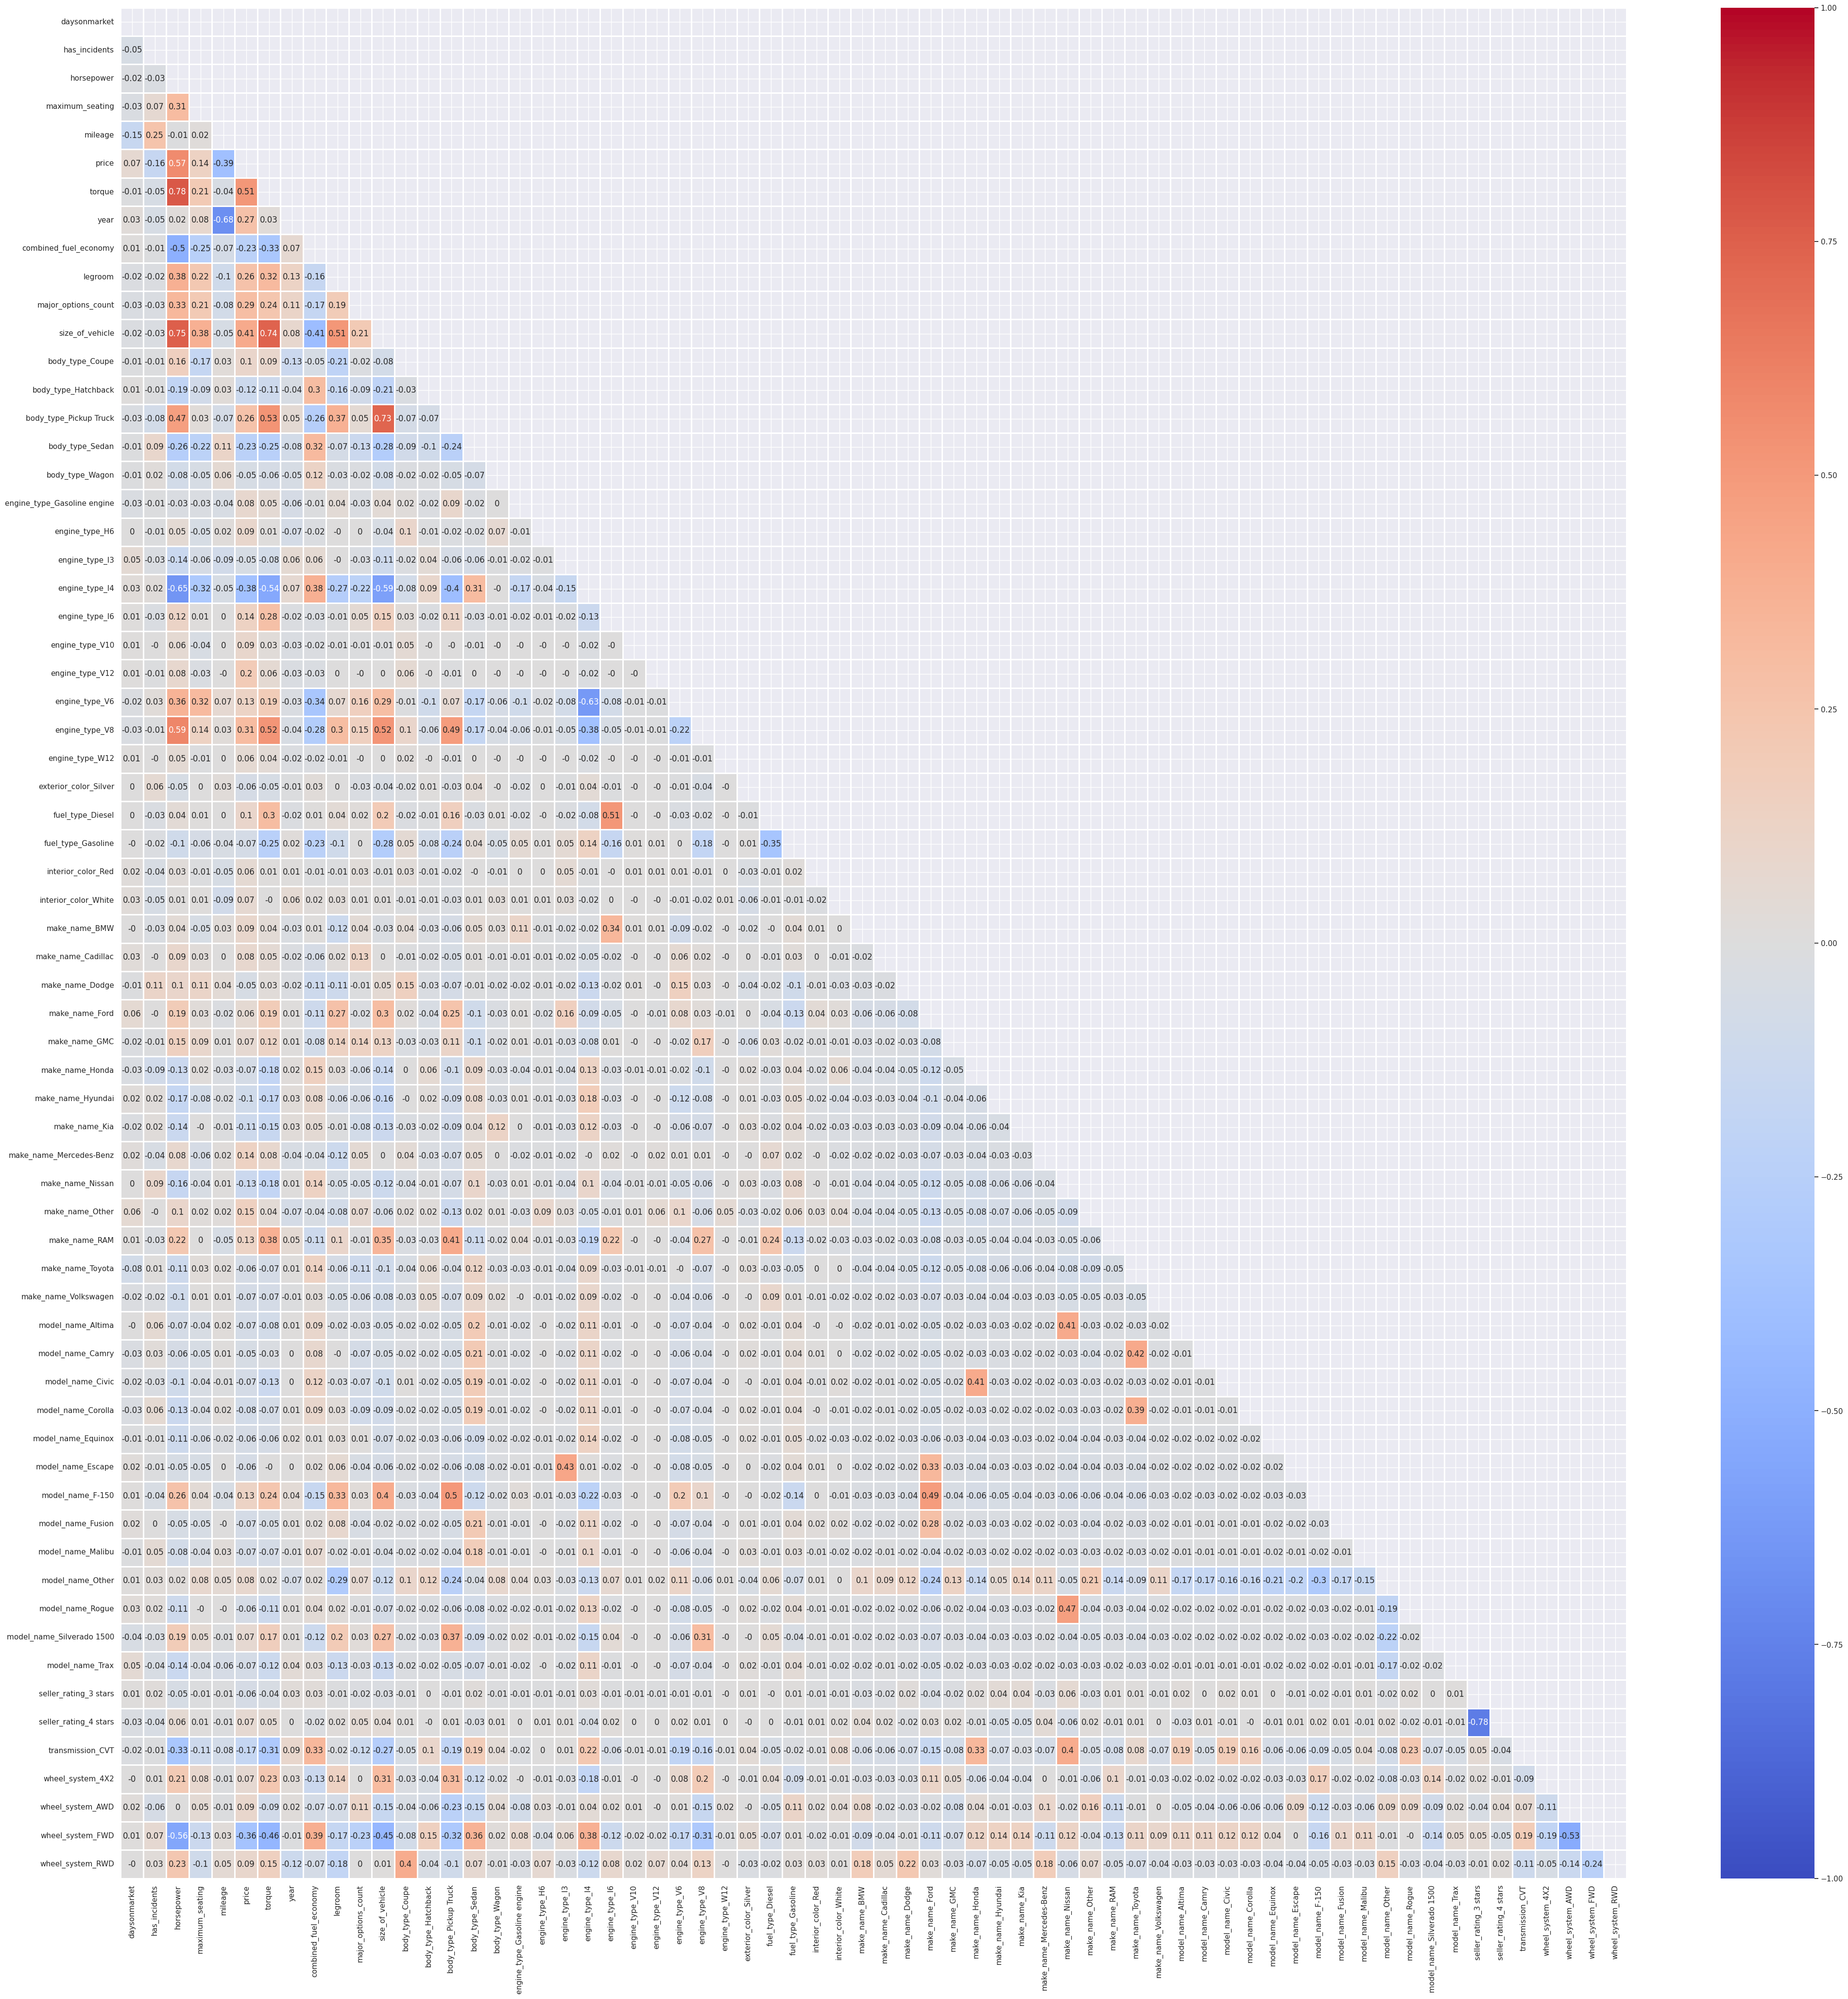

In [ ]:
# instantiating the correlation matrix
corr_df = cars_df2.corr()

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(corr_df)

# Set up the matplotlib figure
plt.figure(figsize=(50, 50))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1,
            center=0, cmap="coolwarm", mask=mask, linewidths=1)
plt.show()

We can see that there are no features that are highly correlated with each other. This means that we do not have to worry about multicollinearity.

We will now save the new dataset and begin training our model on the next notebook.

In [ ]:
# Exporting the dataframe to a csv file
cars_df2.to_csv("cars_cleaned.csv")